<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>


data source : https://www.kaggle.com/c/bike-sharing-demand

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data/train.csv')

In [4]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


# data preprocessing

## datetime

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [13]:
df['year'] = df.datetime.apply(lambda x : x.year)
df['month'] = df.datetime.apply(lambda x : x.month)
df['day'] = df.datetime.apply(lambda x : x.day)
df['hour'] = df.datetime.apply(lambda x : x.hour)
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [14]:
drop_columns = ['datetime', 'casual', 'registered']
df.drop(drop_columns, axis=1, inplace=True)
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2


평가 함수 정의

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate_reg(y, pred):
    rmse = np.sqrt(mean_squared_error(y, pred))
    mae = mean_absolute_error(y, pred)
    rmsle1 = np.sqrt(mean_squared_log_error(y, pred))
    rmsle2 = rmsle(y, pred)
    print('RMSLE1: {0:.3f}, RMSLE2:{1:.3f}, RMSE:{2:.3f}, MAE: {3:.3f}'.format(rmsle1, rmsle2, rmse, mae))
    

RMSLE1 과 RMSLE2 의 차이점

* 사이킷 런을 이용한 RMSLE1 은 데이터 값의 크기에 따라 오버플로/언더플로 오류가 쉽게 일어난다. 

* 그래서 RMSLE2 는 log 를 이용하지하지 않고 log1p(즉, $1 + \log()$)를 이용한다. 

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate_reg(y, pred):
    rmse = np.sqrt(mean_squared_error(y, pred))
    mae = mean_absolute_error(y, pred)
    rmsle_ = rmsle(y, pred)
    print('RMSLE: {0:.3f}, RMSE:{1:.3f}, MAE: {2:.3f}'.format(rmsle_, rmse, mae))
    

음수 값에 의해서 RMSLE1을 활용 못해서 책에 나온데로 수정함 

LinearRegression을 활용한 모델 생성

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = df['count']
X_features = df.drop(['count'], axis = 1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_reg(y_test, pred)

RMSLE: 1.165, RMSE:140.900, MAE: 105.924


pred 와 y_train을 시각화 해보면

In [38]:
def plot_reg_result(expected, predicted):
    range_ = [min(predicted.min(),expected.min()), max(predicted.max(), expected.max())]
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.plot(range_, range_, 'r--')
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.tight_layout()

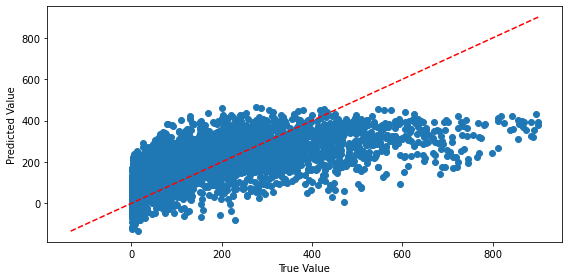

In [39]:
plot_reg_result(y_test, pred)

* 결과 값을 확인해 보면 상당히 큰 것을 알수 있다.  
* 음수 값 까지 있는 것을 확인해 볼수 있다. 

어디서 큰지 확인해 보기 위해서 가장 큰 값의 차이를 가진 상위 5위를 뽑아 보겠다. 

In [41]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)


      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


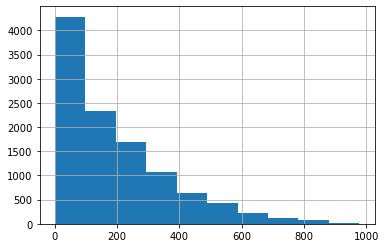

In [43]:
y_target.hist();

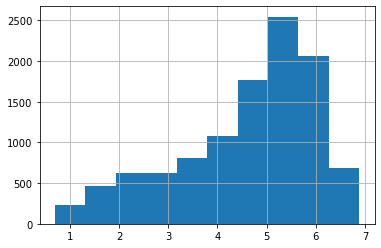

In [46]:
y_log_tranform = np.log1p(y_target)
y_log_tranform.hist();

오른쪽 꼬리의 스큐어드 된 형태에서 정규분포에 가깝게 변환되었습니다.

LinearR을 변환후 fit을 해보겠습니다. 

In [47]:
y_target_log = np.log1p(y_target)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

In [50]:
# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_reg(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE:162.594, MAE: 109.286


RMSLE는 줄어 들었지만, RMSE는 오히려 더 늘어 났습니다. 

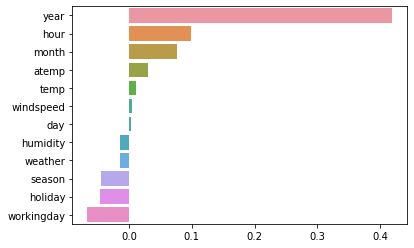

In [54]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index);

year는 숫자이기 때문에 다른 값에 비해 매우 크게 영향을 미치는 것을 알수 있습니다. 이렇듯 회귀에서는 scaling이 매우 중요한데, 특히 시간에서는 숫자 자체의 크기는 중요하지않기 때문에 원핫 인코딩을 해주어야 합니다. 

In [57]:
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, 
                                                    test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_reg(y_test, pred)
    plot_reg_result(y_test, pred)

### LinearRegression ###
RMSLE: 0.590, RMSE:97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE:98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE:113.219, MAE: 72.803


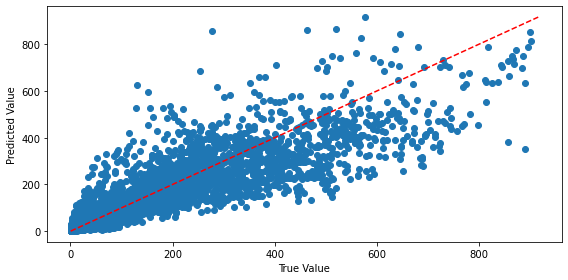

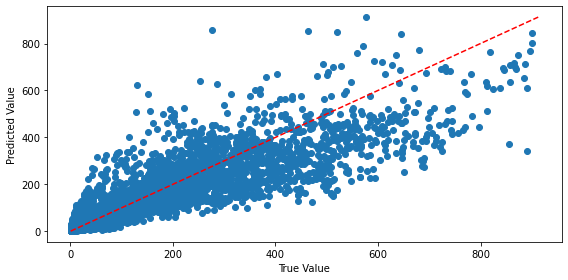

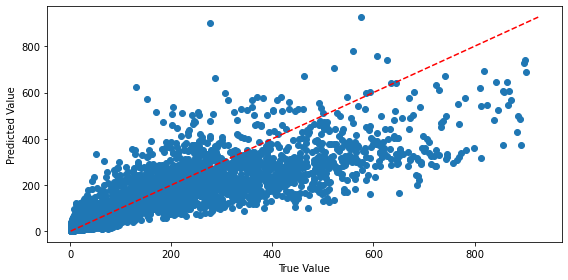

In [77]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

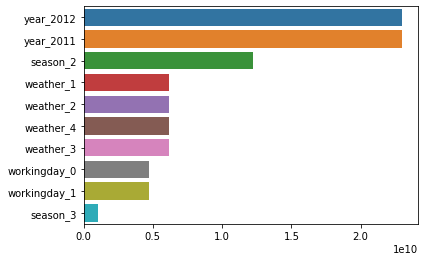

In [75]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y=coef_sort.index);

# Regression Tree

### RandomForestRegressor ###
RMSLE: 0.355, RMSE:50.337, MAE: 31.192
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE:53.346, MAE: 32.752
### XGBRegressor ###
RMSLE: 0.342, RMSE:51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE:47.215, MAE: 29.029


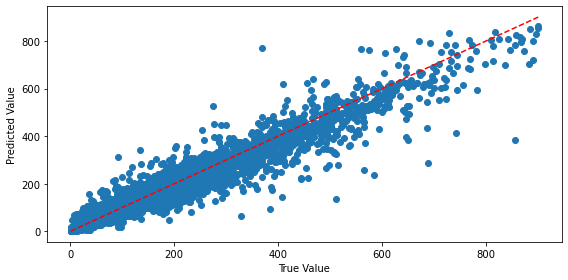

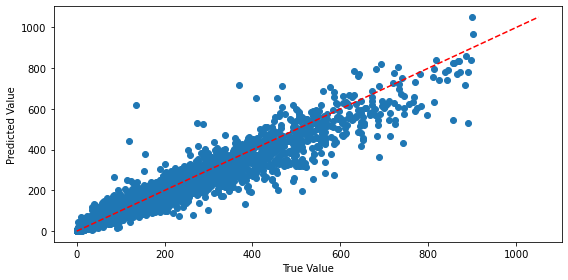

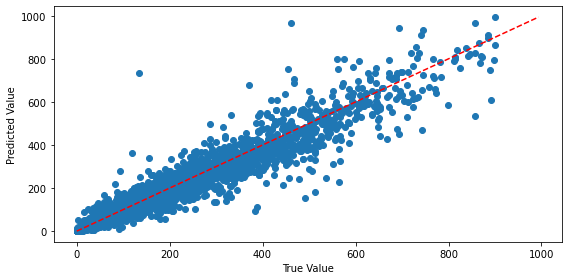

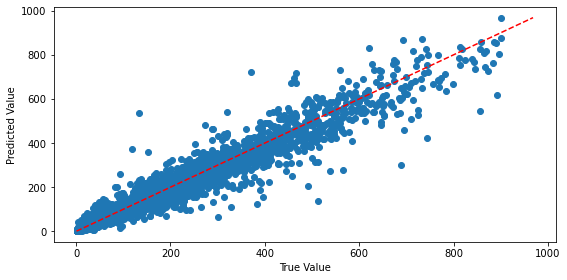

In [78]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

**Reference**

* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>


* 파이썬 머신러닝 완벽 가이드, 권철민